# Árbol de decisión
Un árbol de decisión es un modelo de aprendizaje automático que toma decisiones basadas en una serie de preguntas (nodos) para clasificar o predecir datos. Cada pregunta divide los datos en ramas, lo que lleva a decisiones finales (hojas) que representan las predicciones. Es una técnica de aprendizaje supervisado utilizada en clasificación y regresión. Exportamos el DataFrame ya trabajado anteriormente.

### Importar librerias
* Pandas se utiliza para la manipulación y análisis de datos.
* Matplotlib y Seaborn son bibliotecas para la visualización de datos.
* Scikit-learn proporciona herramientas para dividir los datos, crear el modelo de árboles de decisión y evaluar su rendimiento.

In [171]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


### Carga y visualización de datos

In [173]:
# Carga del dataset
df = pd.read_csv('C:/Users/paula/Documents/_ISPC - CD IA/02 PP1/Proyecto/codigo/3er Entrega/Paula/argentina_brasil_mexico.csv')
df.head()

,Pago,DiasEnvio(Real),DiasEnvio(Programado),BeneficioPorPedido,EstadoEntrega,RiesgoEntregaTardia,Categoria,PaisCliente,IDCliente,SegmentoCliente,...,GananciaPorPedido,RegionPedido,DestinoPedido,EstadoPedido,IDProducto,CategoriaProducto,NombreProducto,PrecioProducto,FechaEnvio,ModoEnvio
0,PAYMENT,4,2,2.346.999.931,Late delivery,1,Women's Apparel,Puerto Rico,8541,Home Office,...,2.346.999.931,South America,Bahía,PENDING_PAYMENT,502,24,Nike Men's Dri-FIT Victory Golf Polo,50,4/15/2017 15:49,Second Class
1,PAYMENT,4,2,3.286.000.061,Late delivery,1,Shop By Sport,Puerto Rico,9272,Home Office,...,3.286.000.061,South America,São Paulo,PENDING_PAYMENT,627,29,Under Armour Girls' Toddler Spine Surge Runni,3.999.000.168,1/22/2017 19:37,Second Class
2,TRANSFER,6,4,5.509.000.015,Late delivery,1,Shop By Sport,Puerto Rico,6398,Consumer,...,5.509.000.015,South America,Buenos Aires,PENDING,627,29,Under Armour Girls' Toddler Spine Surge Runni,3.999.000.168,2/13/2017 9:47,Standard Class
3,TRANSFER,4,4,6.858.999.634,Shipping on time,0,Shop By Sport,Puerto Rico,4209,Consumer,...,6.858.999.634,South America,São Paulo,PENDING,627,29,Under Armour Girls' Toddler Spine Surge Runni,3.999.000.168,04/07/2015 19:08,Standard Class
4,TRANSFER,2,4,5.197.999.954,Advance shipping,0,Women's Apparel,Puerto Rico,8917,Consumer,...,5.197.999.954,South America,São Paulo,PENDING,502,24,Nike Men's Dri-FIT Victory Golf Polo,50,4/15/2017 14:25,Standard Class


In [174]:
# Ver información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9918 entries, 0 to 9917
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Pago                     9918 non-null   object
 1   DiasEnvio(Real)          9918 non-null   int64 
 2   DiasEnvio(Programado)    9918 non-null   int64 
 3   BeneficioPorPedido       9918 non-null   object
 4   EstadoEntrega            9918 non-null   object
 5   RiesgoEntregaTardia      9918 non-null   int64 
 6   Categoria                9918 non-null   object
 7   PaisCliente              9918 non-null   object
 8   IDCliente                9918 non-null   int64 
 9   SegmentoCliente          9918 non-null   object
 10  PaisPedido               9918 non-null   object
 11  FechaPedido              9918 non-null   object
 12  IDPedido                 9918 non-null   int64 
 13  IDArticuloPedido         9918 non-null   int64 
 14  PrecioArticuloPedido     9918 non-null  

### Seleccionar Características Descriptivas y Variable Objetivo

Se definen las variables predictoras x, que incluyen las caracteristicas que impactan en el estado de entrega; y la variable objetivo y, que es el estado de entrega.

In [176]:
# Seleccionar características descriptivas y variable objetivo
X = df[['DiasEnvio(Real)', 'RiesgoEntregaTardia', 'Categoria', 'PaisCliente', 'ModoEnvio']]
y = df['EstadoEntrega']


### Preprocesamiento de datos

#### Conversión de tipos de datos

In [179]:
# Convertir las columnas a tipo de categoría. Esto permite optimizar el uso de memoria y mejora el rendimiento del modelo.
df['Categoria'] = df['Categoria'].astype('category')
df['PaisCliente'] = df['PaisCliente'].astype('category')
df['ModoEnvio'] = df['ModoEnvio'].astype('category')
df['EstadoEntrega'] = df['EstadoEntrega'].astype('category')

# Verificar el tipo de datos para asegurar que se haya realizado la conversión correctamente.
print(df.dtypes)

Pago                         object
DiasEnvio(Real)               int64
DiasEnvio(Programado)         int64
BeneficioPorPedido           object
EstadoEntrega              category
RiesgoEntregaTardia           int64
Categoria                  category
PaisCliente                category
IDCliente                     int64
SegmentoCliente              object
PaisPedido                   object
FechaPedido                  object
IDPedido                      int64
IDArticuloPedido              int64
PrecioArticuloPedido         object
CantidadArticulosPedido       int64
Ventas                       object
TotalArticulosPedido         object
GananciaPorPedido            object
RegionPedido                 object
DestinoPedido                object
EstadoPedido                 object
IDProducto                    int64
CategoriaProducto             int64
NombreProducto               object
PrecioProducto               object
FechaEnvio                   object
ModoEnvio                  c

#### Codificación de Variables Categóricas

In [181]:
# Crear variables dummy (indicadoras) para las variables categóricas
X = pd.get_dummies(X, columns=['Categoria', 'PaisCliente', 'ModoEnvio'], drop_first=True)


#### Manejo de Valores Nulos

In [183]:
# Verificar valores nulos
print(X.isnull().sum())

DiasEnvio(Real)                   0
RiesgoEntregaTardia               0
Categoria_As Seen on  TV!         0
Categoria_Baseball & Softball     0
Categoria_Boxing & MMA            0
Categoria_Camping & Hiking        0
Categoria_Cardio Equipment        0
Categoria_Cleats                  0
Categoria_Electronics             0
Categoria_Fishing                 0
Categoria_Fitness Accessories     0
Categoria_Girls' Apparel          0
Categoria_Golf Apparel            0
Categoria_Golf Bags & Carts       0
Categoria_Golf Balls              0
Categoria_Golf Gloves             0
Categoria_Golf Shoes              0
Categoria_Hockey                  0
Categoria_Hunting & Shooting      0
Categoria_Indoor/Outdoor Games    0
Categoria_Kids' Golf Clubs        0
Categoria_Lacrosse                0
Categoria_Men's Footwear          0
Categoria_Men's Golf Clubs        0
Categoria_Shop By Sport           0
Categoria_Soccer                  0
Categoria_Strength Training       0
Categoria_Tennis & Racquet  

### Dividir el Dataset
Se divide el dataset en un conjunto de entrenamiento, 80% y un conjunto de prueba, 20%.

In [185]:
# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Inicialización y entrenamiento del modelo

In [187]:
# Inicializar el modelo
modelo = DecisionTreeClassifier(criterion='entropy')

# Entrenar el modelo
modelo.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

### Evaluación del modelo

In [189]:
# Predecir en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluar precisión
precision = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {precision}')

# Reporte de clasificación
print(classification_report(y_test, y_pred))


Precisión del modelo: 0.9813508064516129
                   precision    recall  f1-score   support

 Advance shipping       0.97      0.99      0.98       477
    Late delivery       1.00      1.00      1.00      1094
Shipping canceled       0.91      0.62      0.74        84
 Shipping on time       0.96      1.00      0.98       329

         accuracy                           0.98      1984
        macro avg       0.96      0.90      0.92      1984
     weighted avg       0.98      0.98      0.98      1984



#### Resultados del modelo
Precisión del modelo: 98.13%, lo que indica que el modelo es muy efectivo en la clasificación.
El reporte de clasificación muestra que el modelo funciona bien para la mayoría de las clases, pero tiene un menor desempeño para la clase "Shipping canceled" debido a que el recall es más bajo (0.62).

### Mejora del modelo

#### Ajuste de hiperparámetros

In [193]:
# Definición del modelo para búsqueda de hiperpárametros.
dt_model = DecisionTreeClassifier(random_state=42)

# Definición de los parámetros a probar
param_grid = {
    'criterion': ['entropy', 'gini'],  # Criterio para dividir
    'max_depth': [None, 5, 10, 15, 20],  # Profundidad máxima
    'min_samples_split': [2, 5, 10]  # Mínimo de muestras para dividir
}

# Búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1)

# Entrenamiento
grid_search.fit(X_train, y_train)

# Mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores Hiperparámetros:", best_params)


Mejores Hiperparámetros: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}


#### Entrenamiento con los mejores hiperparámetros

In [195]:
# Entrenando el modelo con los mejores hiperparámetros
best_dt_model = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

#### Evaluación del modelo optimizado

In [197]:
# Predicciones
y_pred = best_dt_model.predict(X_test)

# Evaluación
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo mejorado:", accuracy)

# Reporte de clasificación
report = classification_report(y_test, y_pred)
print("Reporte de Clasificación:\n", report)


Precisión del modelo mejorado: 0.9838709677419355
Reporte de Clasificación:
                    precision    recall  f1-score   support

 Advance shipping       0.97      1.00      0.98       477
    Late delivery       1.00      1.00      1.00      1094
Shipping canceled       1.00      0.62      0.76        84
 Shipping on time       0.96      1.00      0.98       329

         accuracy                           0.98      1984
        macro avg       0.98      0.90      0.93      1984
     weighted avg       0.98      0.98      0.98      1984



#### Resultados del modelo optimizado
El modelo optimizado de árboles de decisión ha logrado una precisión del 98.39%, representando una leve mejora en comparación con el modelo inicial.

Las clases "Advance shipping", "Late delivery", y "Shipping on time" continúan mostrando un excelente rendimiento con una precisión y recall cercanas al 100%, lo que refuerza la efectividad del modelo en la predicción de estas clases.
La clase "Shipping canceled", aunque mejoró su precisión al 100%, sigue teniendo dificultades con el recall, alcanzando solo el 62%. Esto significa que, si bien el modelo es efectivo para identificar correctamente las cancelaciones cuando las predice, aún falla en detectar todos los casos de cancelaciones.
La optimización del modelo ha consolidado su precisión general, haciéndolo adecuado para aplicaciones donde se requiera predecir con alta confianza el estado de entrega de los pedidos. Sin embargo, sigue existiendo un área de mejora en la identificación de las cancelaciones. A pesar de esto, los resultados obtenidos proporcionan un excelente punto de partida para implementar soluciones de optimización logística, lo que podría ayudar a la empresa a prevenir demoras y mejorar la satisfacción del cliente.

### Análisis de la importancia de características
Ayuda a identificar que variables son más influyentes en las predicciones del modelo.

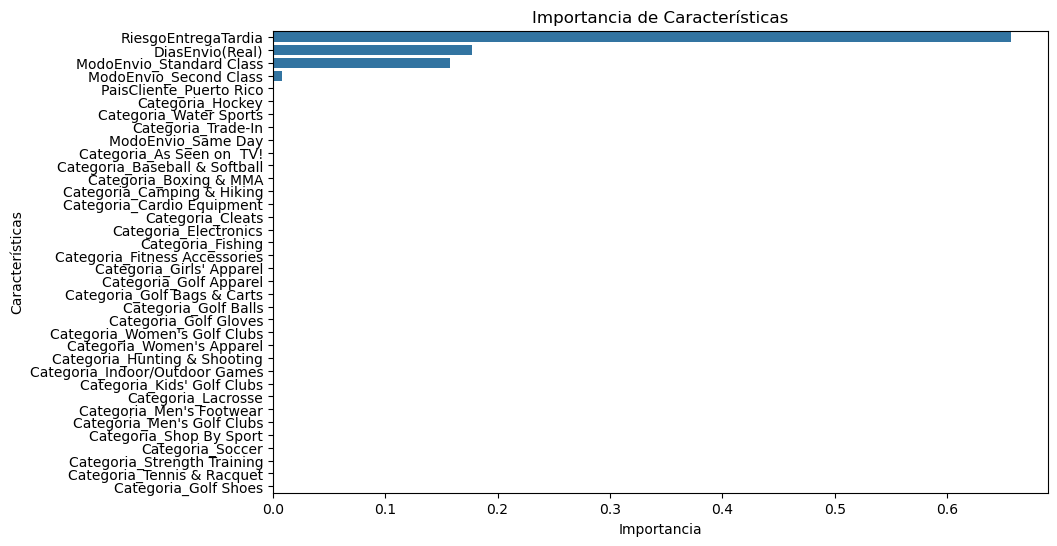

In [200]:
# Importancia de características
importances = best_dt_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Importancia de Características')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()


### Validación cruzada
Se realiza validación cruzada en el modelo optimizado y se calcula la precisión promedio, lo que ayuda a evaluar la estabilidad del modelo en diferentes subconjuntos de datos.

In [202]:
# Validación cruzada
cv_scores = cross_val_score(best_dt_model, X_train, y_train, cv=5)
print("Precisión promedio en Validación Cruzada:", cv_scores.mean())


Precisión promedio en Validación Cruzada: 0.9779425518339027


In [203]:
# Filtrando los errores
errors = X_test[y_pred != y_test]
print(errors)


      DiasEnvio(Real)  RiesgoEntregaTardia  Categoria_As Seen on  TV!  \
9640                3                    0                      False   
3065                3                    0                      False   
2651                2                    0                      False   
8547                2                    0                      False   
8544                3                    0                      False   
9238                2                    0                      False   
7719                4                    0                      False   
304                 3                    0                      False   
6180                4                    0                      False   
6443                3                    0                      False   
2627                4                    0                      False   
349                 4                    0                      False   
47                  4                    0         

### Matriz de confusión

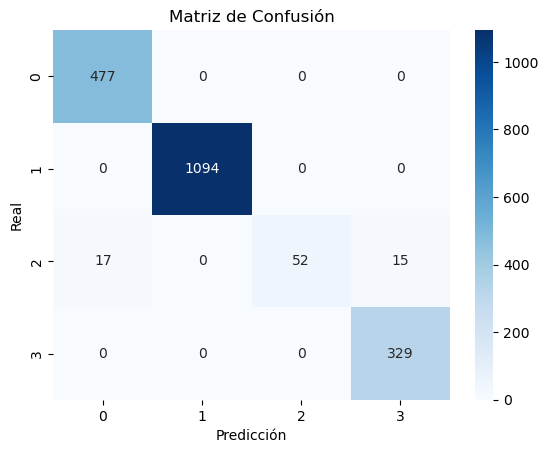

                   precision    recall  f1-score   support

 Advance shipping       0.97      1.00      0.98       477
    Late delivery       1.00      1.00      1.00      1094
Shipping canceled       1.00      0.62      0.76        84
 Shipping on time       0.96      1.00      0.98       329

         accuracy                           0.98      1984
        macro avg       0.98      0.90      0.93      1984
     weighted avg       0.98      0.98      0.98      1984



In [205]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Reporte de clasificación
print(classification_report(y_test, y_pred))

### Curvas de aprendizaje

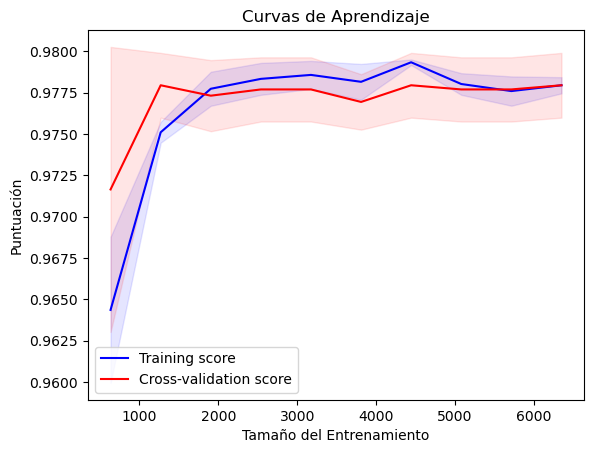

In [207]:
# Evaluación del rendimiento del modelo en función del tamaño del conjunto de entrenamiento.
train_sizes, train_scores, test_scores = learning_curve(best_dt_model, X_train, y_train, 
                                                          cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Media y desviación estándar de los puntajes
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Gráfico de las curvas de aprendizaje
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='red')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.1)
plt.title('Curvas de Aprendizaje')
plt.xlabel('Tamaño del Entrenamiento')
plt.ylabel('Puntuación')
plt.legend()
plt.show()
